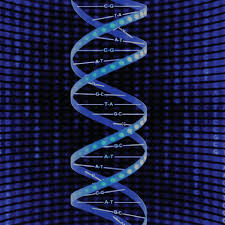

## Introduction

A genome is a complete collection of DNA in an organism. All living species possess a genome, but they differ considerably in size. The human genome, for instance, is arranged into 23 chromosomes, which is a little bit like an encyclopedia being organized into 23 volumes. And if you counted all the characters (individual DNA “base pairs”), there would be more than 6 billion in each human genome. So it’s a huge compilation.


A human genome has about 6 billion characters or letters. If you think the genome(the complete DNA sequence) is like a book, it is a book about 6 billion letters of “A”, “C”, “G” and “T”. Now, everyone has a unique genome. Nevertheless, scientists find most parts of the human genomes are alike to each other.


As a data-driven science, genomics extensively utilizes machine learning to capture dependencies in data and infer new biological hypotheses. Nonetheless, the ability to extract new insights from the exponentially increasing volume of genomics data requires more powerful machine learning models. By efficiently leveraging large data sets, deep learning has reconstructed fields such as computer vision and natural language processing. It has become the method of preference for many genomics modeling tasks, including predicting the influence of genetic variation on gene regulatory mechanisms such as DNA receptiveness and splicing.


So in this article, we will understand how to interpret a DNA structure and how machine learning algorithms can be used to build a prediction model on DNA sequence data.


## How is a DNA Sequence represented?

The diagram shows a tiny bit of a DNA double helix structure.
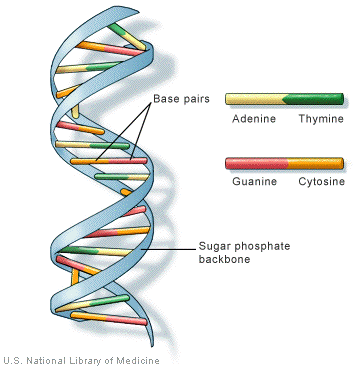

The double-helix is the correct chemical representation of DNA. But DNA is special. It’s a nucleotide made of four types of nitrogen bases: Adenine (A), Thymine (T), Guanine (G), and Cytosine. We always call them A, C, Gand T.

These four chemicals link together via hydrogen bonds in any possible order making a chain, and this gives one thread of the DNA double-helix. And the second thread of the double-helix balance the first. So if you have A on the first thread, you have to have T on the second. 

Furthermore, C and G always balance each other. So once you identify one thread of the helix, you can always spell the other.

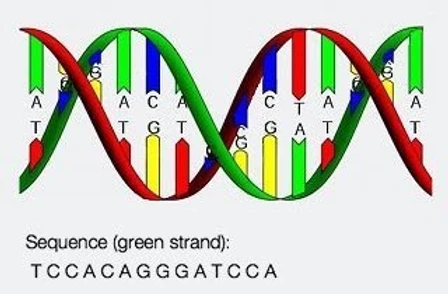


The order, or sequence, of these bases, determines what biological instructions are contained in a strand of DNA. For example, the sequence ATCGTT might instruct for blue eyes, while ATCGCT might instruct for brown.



## DNA data handling using Biopython

Here is a brief example of how to work with a DNA sequence in fasta format using Biopython. The sequence object will contain attributes such as id and sequence and the length of the sequence that you can work with directly.


We will use Bio.SeqIO from Biopython for parsing DNA sequence data(fasta). It provides a simple uniform interface to input and output assorted sequence file formats.

In [7]:
from Bio import SeqIO
for sequence in SeqIO.parse(r'C:\Users\Sarthak\Downloads\GenomicsinNlpGrp-04rollno-4553\GenomicsinNlp(45,53)\example_dna.fa', "fasta"):
    print(sequence.id)
    print(sequence.seq)
    print(len(sequence))

ENST00000435737.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
390
ENST00000419127.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACCATTTACGACTCCCTTTTGCCCATCCGGAGCAG

So it produces the sequence ID, sequence and length of the sequence.



## Now that we can load and manipulate biological sequence data easily, how can we use it for machine learning or deep learning?

Now since machine learning or deep learning models require input to be feature matrices or numerical values and currently we still have our data in character or string format. So the next step is to encode these characters into matrices.


There are 3 general approaches to encode sequence data:

1. Ordinal encoding DNA Sequence

2. One-hot encoding DNA Sequence

3. DNA sequence as a “language”, known as k-mer counting

So let us implement each of them and see which gives us the perfect input features.

## Ordinal encoding DNA sequence data

In this approach, we need to encode each nitrogen bases as an ordinal value. For example “ATGC” becomes [0.25, 0.5, 0.75, 1.0]. Any other base such as “N” can be a 0.


So let us create functions such as for creating a NumPy array object from a sequence string, and a label encoder with the DNA sequence alphabet “a”, “c”, “g” and “t”, but also a character for anything else, “n”.

In [8]:
import numpy as np
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'n', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

And here is a function to encode a DNA sequence string as an ordinal vector. It returns a NumPy array with A=0.25, C=0.50, G=0.75, T=1.00, n=0.00.

In [9]:
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25 # A
    float_encoded[float_encoded == 1] = 0.50 # C
    float_encoded[float_encoded == 2] = 0.75 # G
    float_encoded[float_encoded == 3] = 1.00 # T
    float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
    return float_encoded


#Let’s try it out a simple short sequence:
seq_test = 'TTCAGCCAGTG'
ordinal_encoder(string_to_array(seq_test))

array([1.  , 1.  , 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.25, 0.75, 1.  , 0.75])

## One-hot encoding DNA Sequence

Another approach is to use one-hot encoding to represent the DNA sequence. This is widely used in deep learning methods and lends itself well to algorithms like convolutional neural networks. In this example, “ATGC” would become [0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]. And these one-hot encoded vectors can either be concatenated or turned into 2-dimensional arrays.

In [10]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded


#So let’s try it out with a simple short sequence:
seq_test = 'GAATTCTCGAA'
one_hot_encoder(string_to_array(seq_test))

C:\Users\Sarthak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

## DNA sequence as a “language”, known as k-mer counting

A hurdle that still remains is that none of these above methods results in vectors of uniform length, and that is a necessity for feeding data to a classification or regression algorithm. So with the above methods, you have to resort to things like truncating sequences or padding with “n” or “0” to get vectors of uniform length.


DNA and protein sequences can be seen as the language of life. The language encodes instructions as well as functions for the molecules that are found in all life forms. The sequence language resemblance continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides are words, and nucleotide bases and amino acids are the alphabets. Since the relationship seems so likely, it stands to reason that the natural language processing(NLP) should also implement the natural language of DNA and protein sequences.


The method we use here is manageable and easy. We first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if we use “words” of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.


In genomics, we refer to these types of manipulations as “k-mer counting”, or counting the occurrences of each possible k-mer sequence and Python natural language processing tools make it super easy.

In [11]:
def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]


#So let’s try it out with a simple sequence:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=4)

['gtgc',
 'tgcc',
 'gccc',
 'ccca',
 'ccag',
 'cagg',
 'aggt',
 'ggtt',
 'gttc',
 'ttca',
 'tcag',
 'cagt',
 'agtg',
 'gtga',
 'tgag',
 'gagt',
 'agtg',
 'gtga',
 'tgac',
 'gaca',
 'acac',
 'caca',
 'acag',
 'cagg',
 'aggc',
 'ggca',
 'gcag']

It returns a list of k-mer “words.” 

In [12]:
words = Kmers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence

'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

We can tune both the word length and the amount of overlap. This allows us to determine how the DNA sequence information and vocabulary size will be important in your application. For example, if we use words of length 6, and there are 4 letters, we have a vocabulary of size 4096 possible words. we can then go on and create a bag-of-words model like we would in NLP.


Let’s make a couple more “sentences”

In [13]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

In [14]:
#Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]], dtype=int64)

 Here comes machine learning…


Now that we have learned how to extract feature matrix from the DNA sequence, let us apply our newly acquired knowledge to a real-life machine learning use case.

**Objective:** Build a classification model that is trained on the human DNA sequence and can predict a gene family based on the DNA sequence of the coding sequence. To test the model, we will use the DNA sequence of humans, dogs, and chimpanzees and compare the accuracies.

Gene families are groups of related genes that share a common ancestor. Members of gene families may be paralogs or orthologs. Gene paralogs are genes with similar sequences from within the same species while gene orthologs are genes with similar sequences in different species.

The dataset contains human DNA sequence, Dog DNA sequence, and Chimpanzee DNA sequence.

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
%matplotlib inline
for dirname, _, filenames in os.walk('../DS1/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Load human DNA data

In [18]:
human_dna = pd.read_table(r'C:\Users\human.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0.5, 1.0, 'Class distribution of Human DNA')

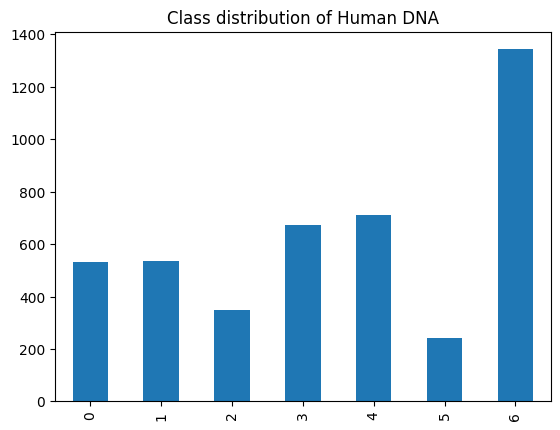

In [19]:
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human DNA")

### Load Chimpanzee DNA data

In [21]:
chimp_dna = pd.read_table(r'C:\Users\chimpanzee.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Text(0.5, 1.0, 'Class distribution of Chimpanzee DNA')

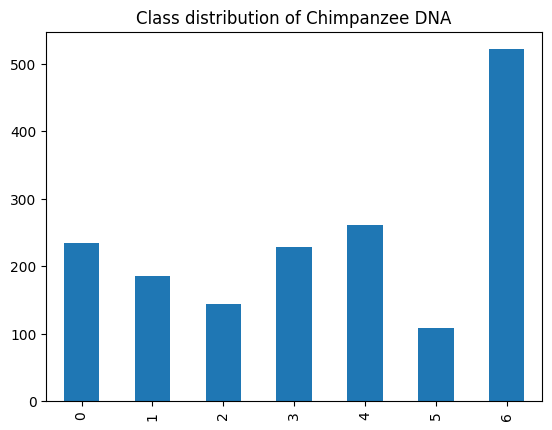

In [22]:
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee DNA")

### Load Dog DNA data

In [23]:
dog_dna = pd.read_table(r'C:\Users\dog.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


Text(0.5, 1.0, 'Class distribution of Dog DNA')

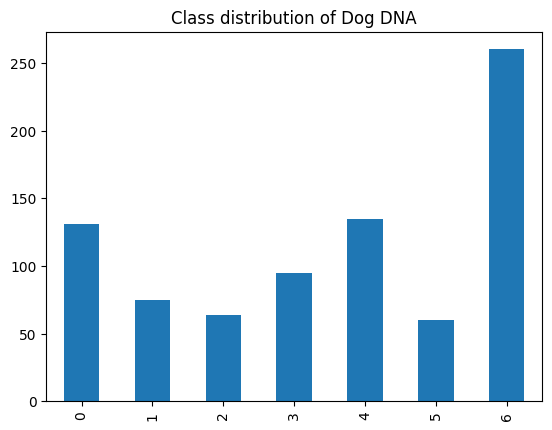

In [24]:
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")

Here are the definitions for each of the 7 classes and how many there are in the human training data:
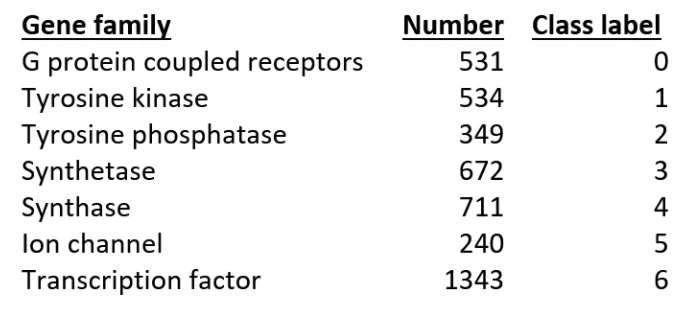

Now we have all our data loaded, the next step is to convert a sequence of characters into k-mer words, default **size = 6 (hexamers)**. The function **Kmers_funct()** will collect all possible overlapping k-mers of a specified length from any sequence string.

In [25]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

#convert our training data sequences into short overlapping k-mers of length 6. 
#Lets do that for each species of data we have using our Kmers_funct function.

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

The DNA sequence is changed to lowercase, divided into all possible k-mer words of length 6, and ready for the next step.

In [27]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


We need to now convert the lists of k-mers for each gene into string sentences of words that can be used to create the Bag of Words model. We will make a target variable y to hold the class labels.

In [28]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

Now let's do the same for chimpanzee and dog.

In [29]:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

In [30]:
y_human

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

So the target variable contains an array of class values.

Creating the Bag of Words model using CountVectorizer(). This is equivalent to k-mer counting. The n-gram size of 4 was previously determined by testing.

Convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary:

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [32]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


So, for humans we have **4380** genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts. For chimp and dog, we have the same number of features with **1682** and **820** genes respectively.


So now that we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.


Here we will use the human data to train the model, holding out 20% of the human data to test the model. Then we can challenge the model’s generalizability by trying to predict sequence function in other species (the chimpanzee and dog).


Next, train/test split human dataset and build simple multinomial naive Bayes classifier.

We can build a model with different ngram sizes, here we’ll go ahead with an ngram size of 4 and a model alpha of 0.1.

In [33]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

#Now let's make predictions on the human hold out test set and see how it performes on unseen data.

In [36]:
y_pred = classifier.predict(X_test)

Okay, so let's look at some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score. We are getting really good results on our unseen data, so it looks like our model did not overfit to the training data. In a real project I would go back and sample many more train test splits since we have a relatively small data set.

Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
[[ 99   0   0   0   1   0   2]
 [  0 104   0   0   0   0   2]
 [  0   0  78   0   0   0   0]
 [  0   0   0 124   0   0   1]
 [  1   0   0   0 143   0   5]
 [  0   0   0   0   0  51   0]
 [  1   0   0   1   0   0 263]]


<Axes: >

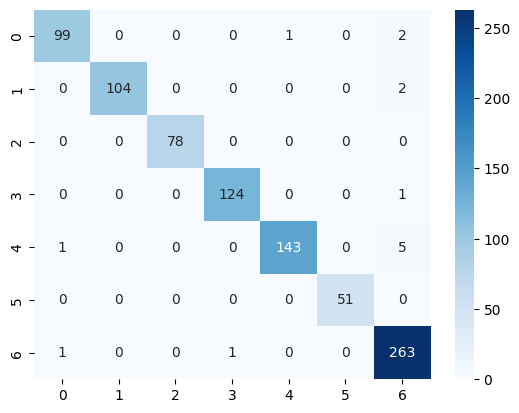

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

Now for the real test. Let's see how our model perfoms on the DNA sequences from other species. First we'll try the Chimpanzee, which we would expect to be very similar to human. Then we will try man's (and woman's) best friend, the Dog DNA sequences.

In [45]:
# Predicting the chimp, dog sequences
y_pred_chimp = classifier.predict(X_chimp)

Confusion matrix for predictions on Chimpanzee test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993
[[232   0   0   0   0   0   2]
 [  0 184   0   0   0   0   1]
 [  0   0 144   0   0   0   0]
 [  0   0   0 227   0   0   1]
 [  2   0   0   0 254   0   5]
 [  0   0   0   0   0 109   0]
 [  0   0   0   0   0   0 521]]


<Axes: >

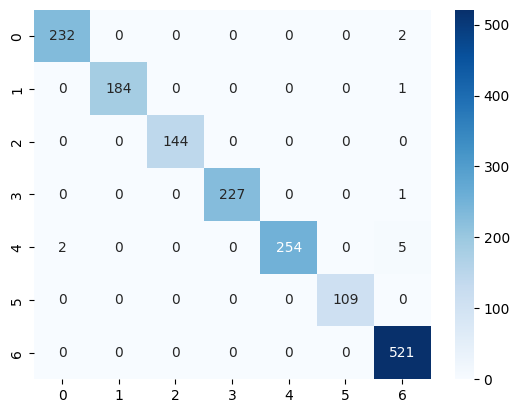

In [46]:
# performance on chimpanzee genes
print("Confusion matrix for predictions on Chimpanzee test DNA sequence\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

#Get the confusion matrix
cf_matrix = confusion_matrix(y_chim, y_pred_chimp)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

In [47]:
y_pred_dog = classifier.predict(X_dog)

Confusion matrix for predictions on Dog test DNA sequence

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925
[[127   0   0   0   0   0   4]
 [  0  63   0   0   1   0  11]
 [  0   0  49   0   1   0  14]
 [  1   0   0  81   2   0  11]
 [  4   0   0   1 126   0   4]
 [  4   0   0   0   1  53   2]
 [  0   0   0   0   0   0 260]]


<Axes: >

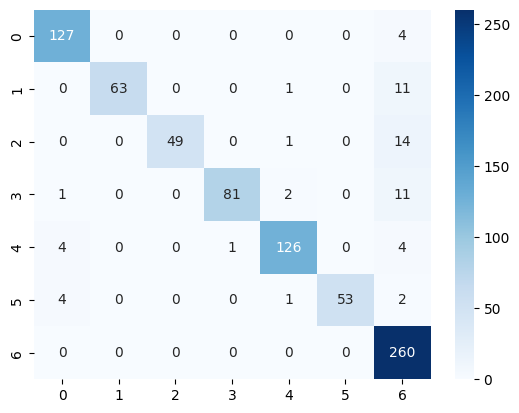

In [49]:
# performance on dog genes
print("Confusion matrix for predictions on Dog test DNA sequence\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

#Get the confusion matrix
cf_matrix = confusion_matrix(y_dog, y_pred_dog)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

The model seems to produce good results on human data. It also does on Chimpanzee which is because the Chimpanzee and humans share the same genetic hierarchy. The performance of the dog is not quite as good which is because the dog is more diverging from humans than the chimpanzee.